In [23]:
# Image Preprocessing Demo

## 1. Imports & Config

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set your image path here
IMAGE_PATH = 'test/with_mask_60.jpg'
IMAGE_SIZE = 224

# Helper to plot two images
def plot_pair(a, b, title_a, title_b, cmap=None):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(a, cmap=cmap)
    axs[0].set_title(title_a)
    axs[0].axis('off')
    axs[1].imshow(b, cmap=cmap)
    axs[1].set_title(title_b)
    axs[1].axis('off')
    plt.show()


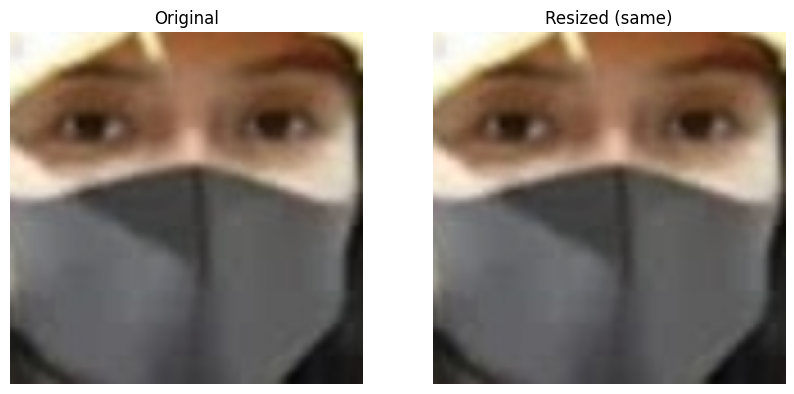

In [24]:
# Read and resize
img_bgr = cv2.imread(IMAGE_PATH)
img = cv2.resize(img_bgr, (IMAGE_SIZE, IMAGE_SIZE))
# Convert for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_pair(img_rgb, img_rgb, 'Original', 'Resized (same)')


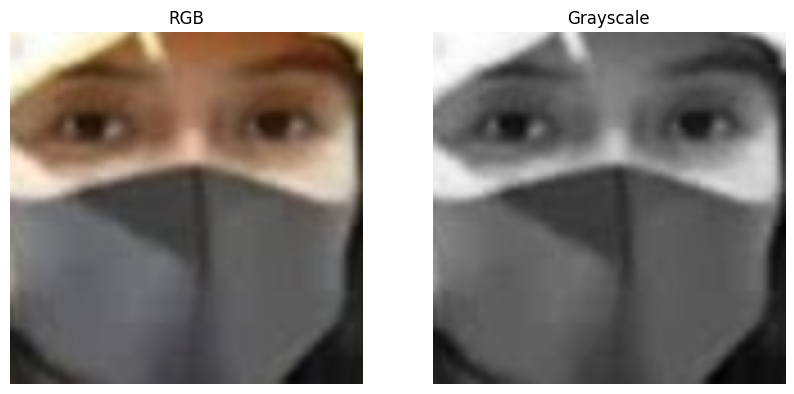

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_pair(img_rgb, gray, 'RGB', 'Grayscale', cmap='gray')


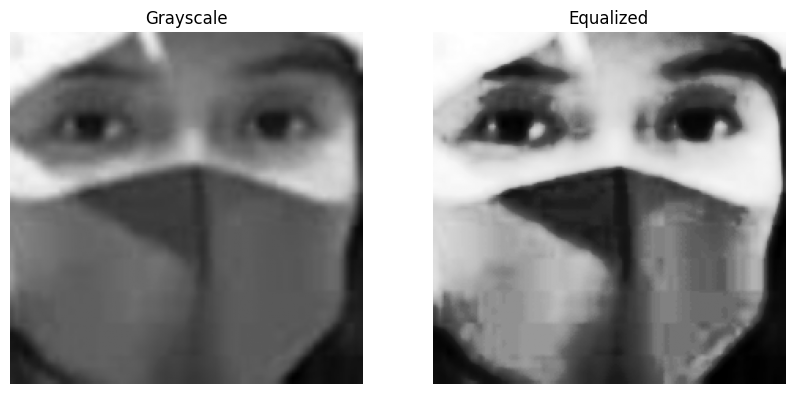

In [26]:
eq = cv2.equalizeHist(gray)
plot_pair(gray, eq, 'Grayscale', 'Equalized', cmap='gray')


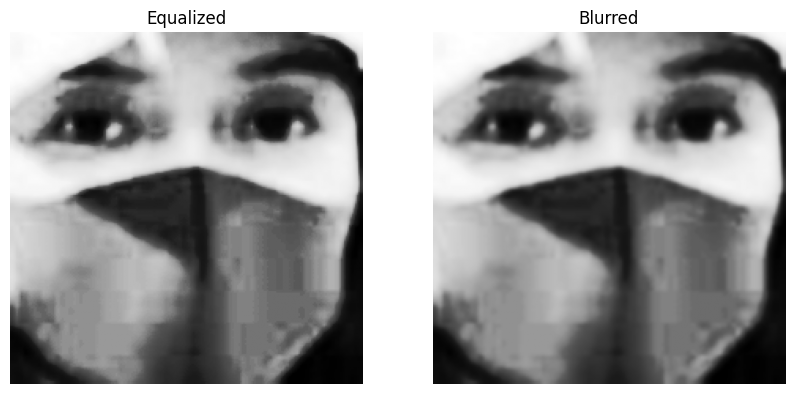

In [27]:
blur = cv2.GaussianBlur(eq, (3, 3), 0)
plot_pair(eq, blur, 'Equalized', 'Blurred', cmap='gray')


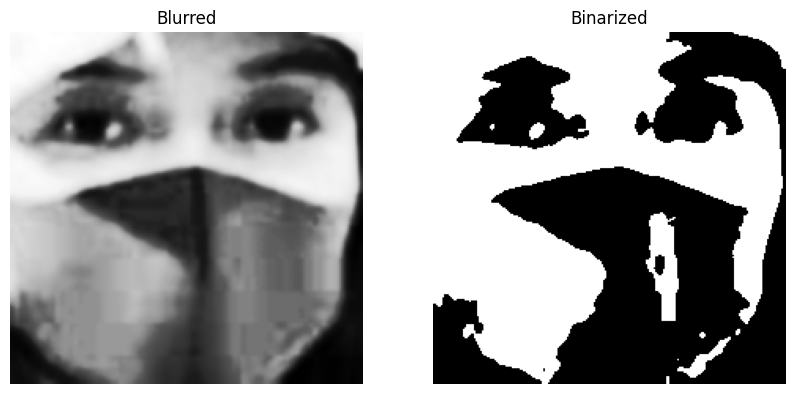

In [28]:
_, binar = cv2.threshold(blur, 0, 255,
                         cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_pair(blur, binar, 'Blurred', 'Binarized', cmap='gray')


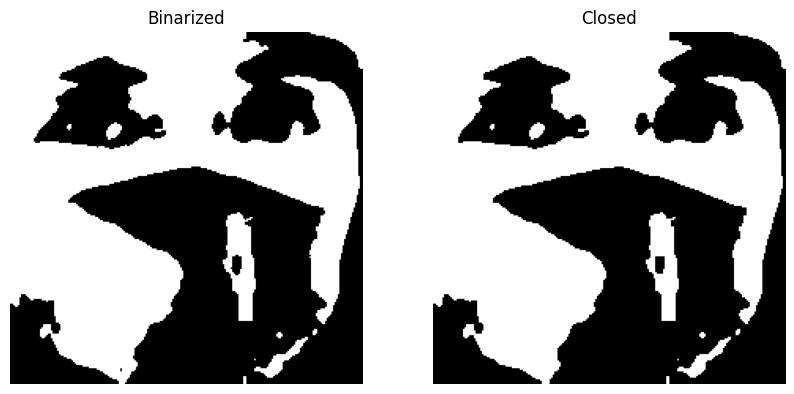

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(binar, cv2.MORPH_CLOSE, kernel)
plot_pair(binar, closed, 'Binarized', 'Closed', cmap='gray')


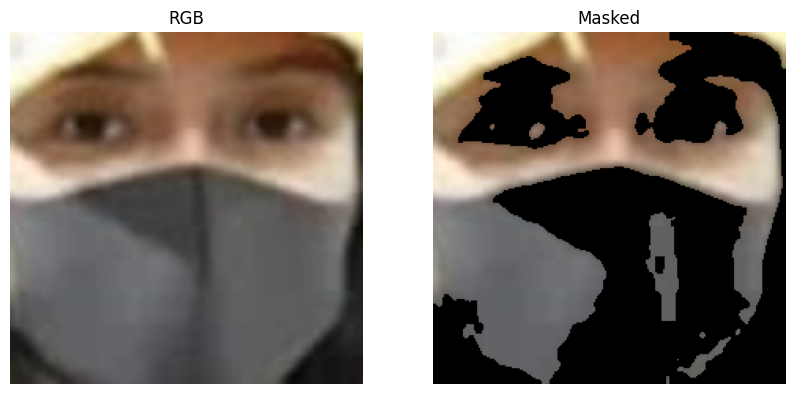

In [30]:
mask = closed.astype(np.float32) / 255.0
mask3 = np.stack([mask] * 3, axis=-1)
masked = (img_rgb * mask3).astype(np.uint8)
plot_pair(img_rgb, masked, 'RGB', 'Masked', cmap=None)


In [31]:
preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(masked)
print('Preprocessed shape:', preprocessed.shape)
# (You can also visualize histograms or slices of `preprocessed` if desired.)


Preprocessed shape: (224, 224, 3)
